-----
<div class="alert alert-block alert-info">
    <h1>Group presentation</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

%config InlineBackend.figure_format = 'retina'
df=pd.read_csv("airbnb_Open_Data.csv")
df.head(1)

/var/folders/99/fxyvyk9s3mzf6fpwtfb2wr_h0000gn/T/ipykernel_16897/1580549951.py:7: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN


### Initial Sniff of the data set

In [2]:
df.shape

(102599, 26)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [4]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

### Cleaning data

In [5]:
#Filling NaN of reviews per month
df["reviews per month"].fillna(df["reviews per month"].mean(),inplace=True)

In [6]:
frequency=pd.crosstab(df["country"], columns="count")
print(frequency)
# we can drop country and country code col because there is only one value

col_0           count
country              
United States  102067


In [7]:
frequency=pd.crosstab(df['host name'], columns="count")
print(frequency)

col_0                     count
host name                      
#NAME?                        2
'Cil                          1
(Ari) HENRY LEE               2
(Email hidden by Airbnb)      8
(Mary) Haiy                   4
...                         ...
단비                            1
빈나                            2
소정                            3
진                             1
현선                            2

[13190 rows x 1 columns]


In [8]:
df.drop(["last review", "country", "country code", "host name", "id","calculated host listings count","house_rules", "license"], axis=1)

,NAME,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,0.210000,4.0,286.0
1,Skylit Midtown Castle,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,0.380000,4.0,228.0
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,1.374022,5.0,352.0
3,NaN,85098326012,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,4.640000,4.0,322.0
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,0.100000,3.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,12312296767,verified,Brooklyn,Williamsburg,40.70862,-73.94651,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,1.374022,3.0,227.0
102595,Best Location near Columbia U,77864383453,unconfirmed,Manhattan,Morningside Heights,40.80460,-73.96545,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,0.020000,2.0,395.0
102596,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Brooklyn,Park Slope,40.67505,-73.98045,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,1.374022,5.0,342.0
102597,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Queens,Long Island City,40.74989,-73.93777,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,0.100000,3.0,386.0


In [9]:
df['neighbourhood group'].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [10]:
df['neighbourhood group'] = df['neighbourhood group'].replace('brookln', 'Brooklyn').replace('manhatan', 'Manhattan')
df['neighbourhood group'].value_counts()

Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: neighbourhood group, dtype: int64

In [11]:
df['price'] = df['price'].dropna(axis=0)

In [12]:
# Convert the price and service price into float from object

def clean_and_convert_price(price_str):
    try:
        price_str = price_str.replace('$', '').replace(',', '').replace(' ', '').replace('.', '').strip()
        return int(price_str)
    except:
        return None

df['price'] = df['price'].apply(clean_and_convert_price)
df['service fee'] = df['service fee'].apply(clean_and_convert_price)


In [13]:
print(df['price'].unique())
#print(df['service fee'].unique())

[ 966.  142.  620. ... 1184.  905.  309.]


In [14]:
df['room type'] = df['room type'].astype('category')
df['neighbourhood group'] = df['neighbourhood group'].astype('category')
# Remove rows with missing values in the 'Weight' column
df = df.dropna(subset=['price'])
# Convert the 'Weight' column to integers
df['price'] = df['price'].astype(int)
#df_new['price'] = df_new['price'].astype('int64')
df = df.dropna(subset=['number of reviews'])
# Convert the 'Weight' column to integers
df['number of reviews'] = df['number of reviews'].astype(int)
#df_new['number of reviews'] = df_new['number of reviews'].astype('int64')
df['reviews per month'] = df['reviews per month'].astype('int64')
df = df.dropna(subset=['review rate number'])
df['review rate number'] = df['review rate number'].astype(int)

### Visualization

In [15]:
print(df['room type'].unique())

['Private room', 'Entire home/apt', 'Shared room', 'Hotel room']
Categories (4, object): ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']


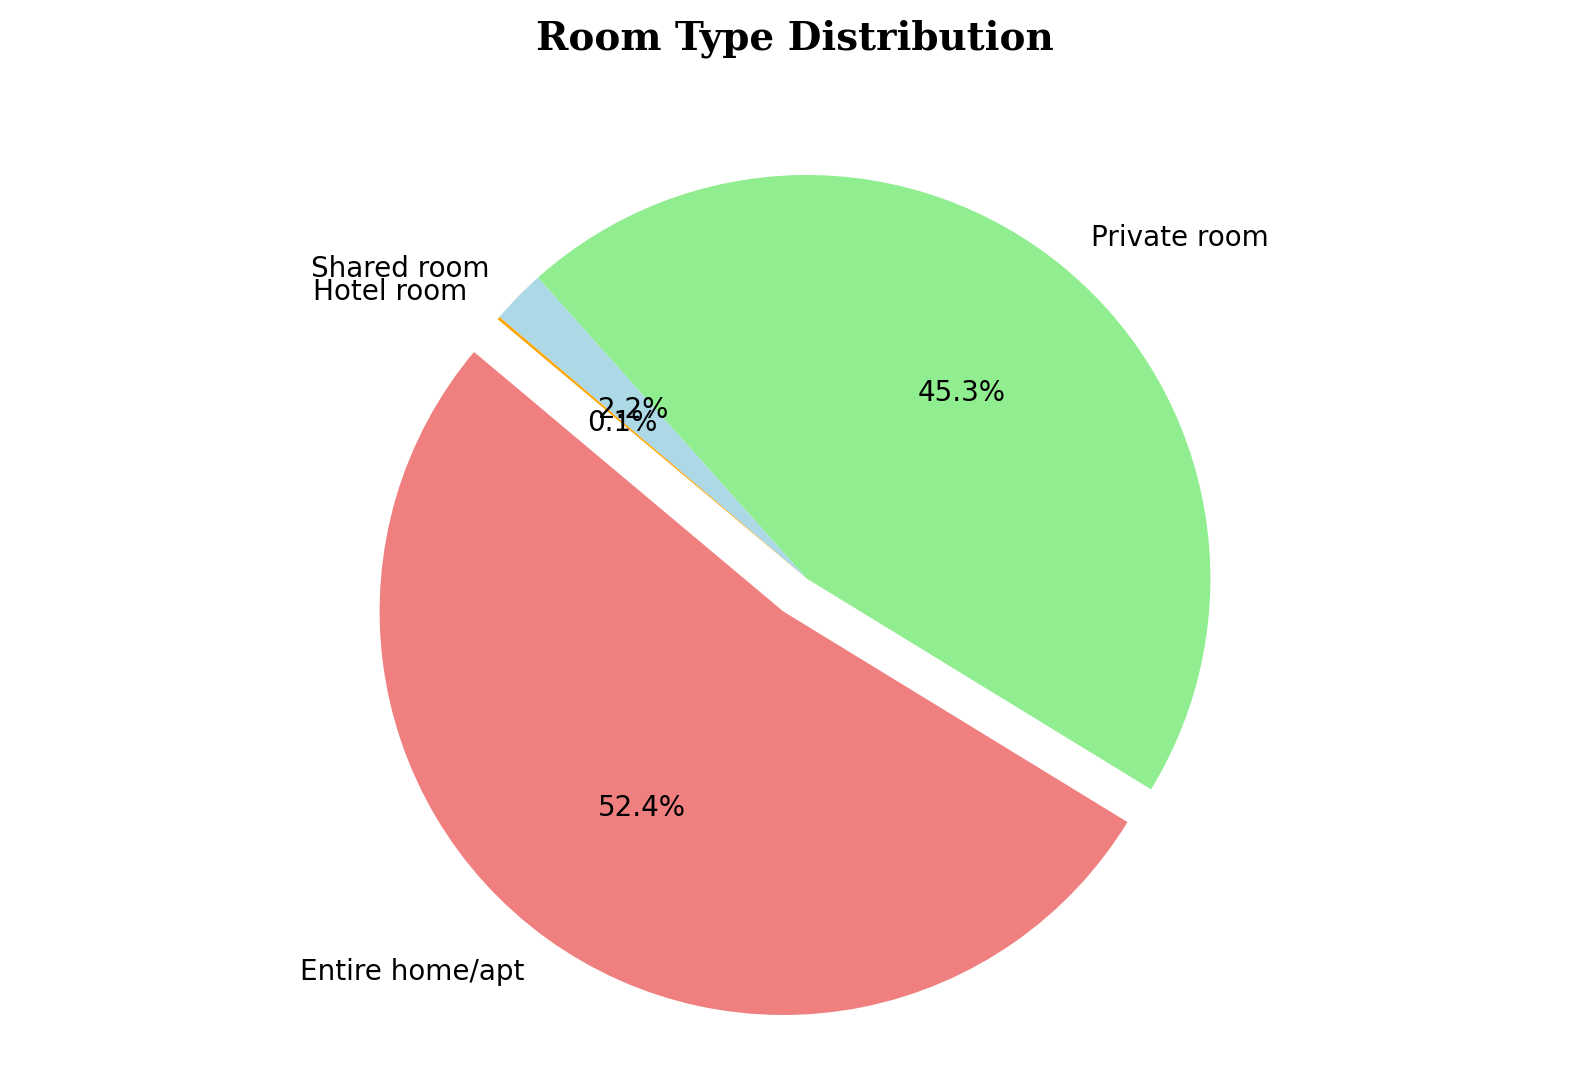

In [16]:
room_counts = df['room type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 6))
index_largest = 0 #neighborhood_counts.index(max(neighborhood_counts))

# Create a list to specify the explosion for each group
explode = [0] * len(room_counts)
explode[index_largest] = 0.1  # Set the explosion for the largest portion group

plt.pie(room_counts, labels=room_counts.index, explode=explode, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue', 'orange'], startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular. #"#F46C43", "pink", "#b1b5b2","#878787","#494949"
plt.title('Room Type Distribution', weight = "bold", size=14, fontstyle='normal', fontfamily='serif', pad = 30)
plt.show()

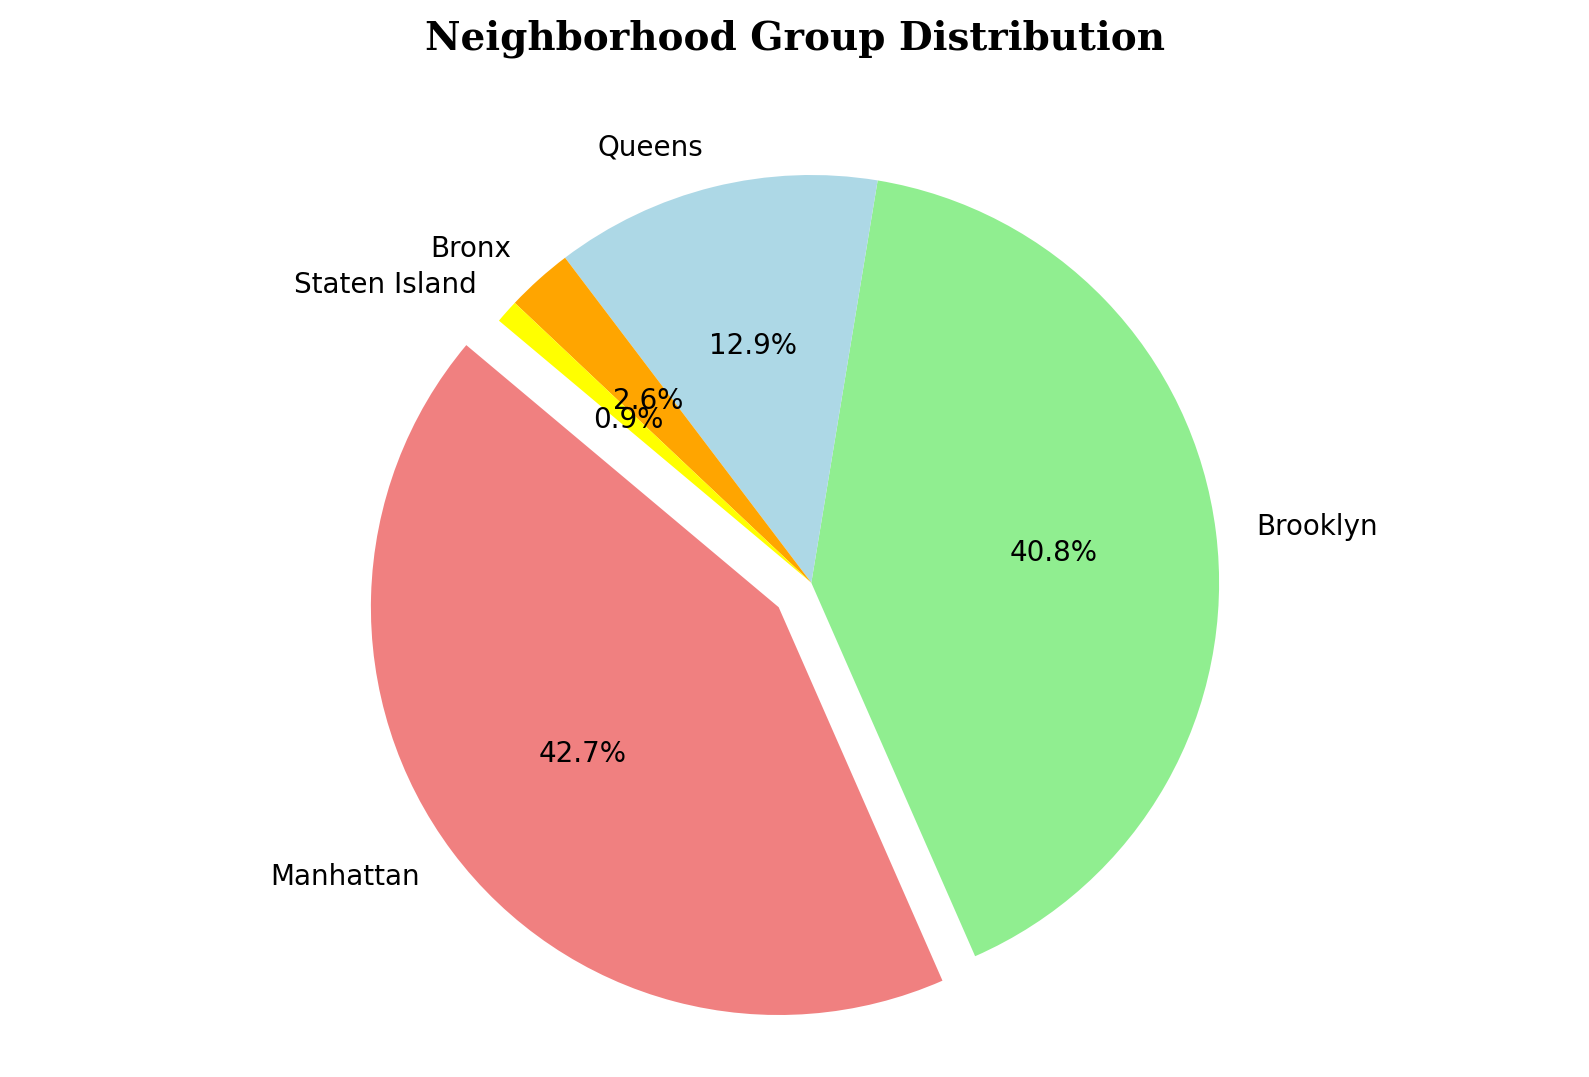

In [17]:
neighborhood_counts = df['neighbourhood group'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 6))
index_largest = 0 

# Create a list to specify the explosion for each group
explode = [0] * len(neighborhood_counts)
explode[index_largest] = 0.1  # Set the explosion for the largest portion group

plt.pie(neighborhood_counts, labels=neighborhood_counts.index, explode=explode, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue', 'orange', 'yellow'], startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Neighborhood Group Distribution', weight = "bold", size=14, fontstyle='normal', fontfamily='serif', pad = 30)
plt.show()

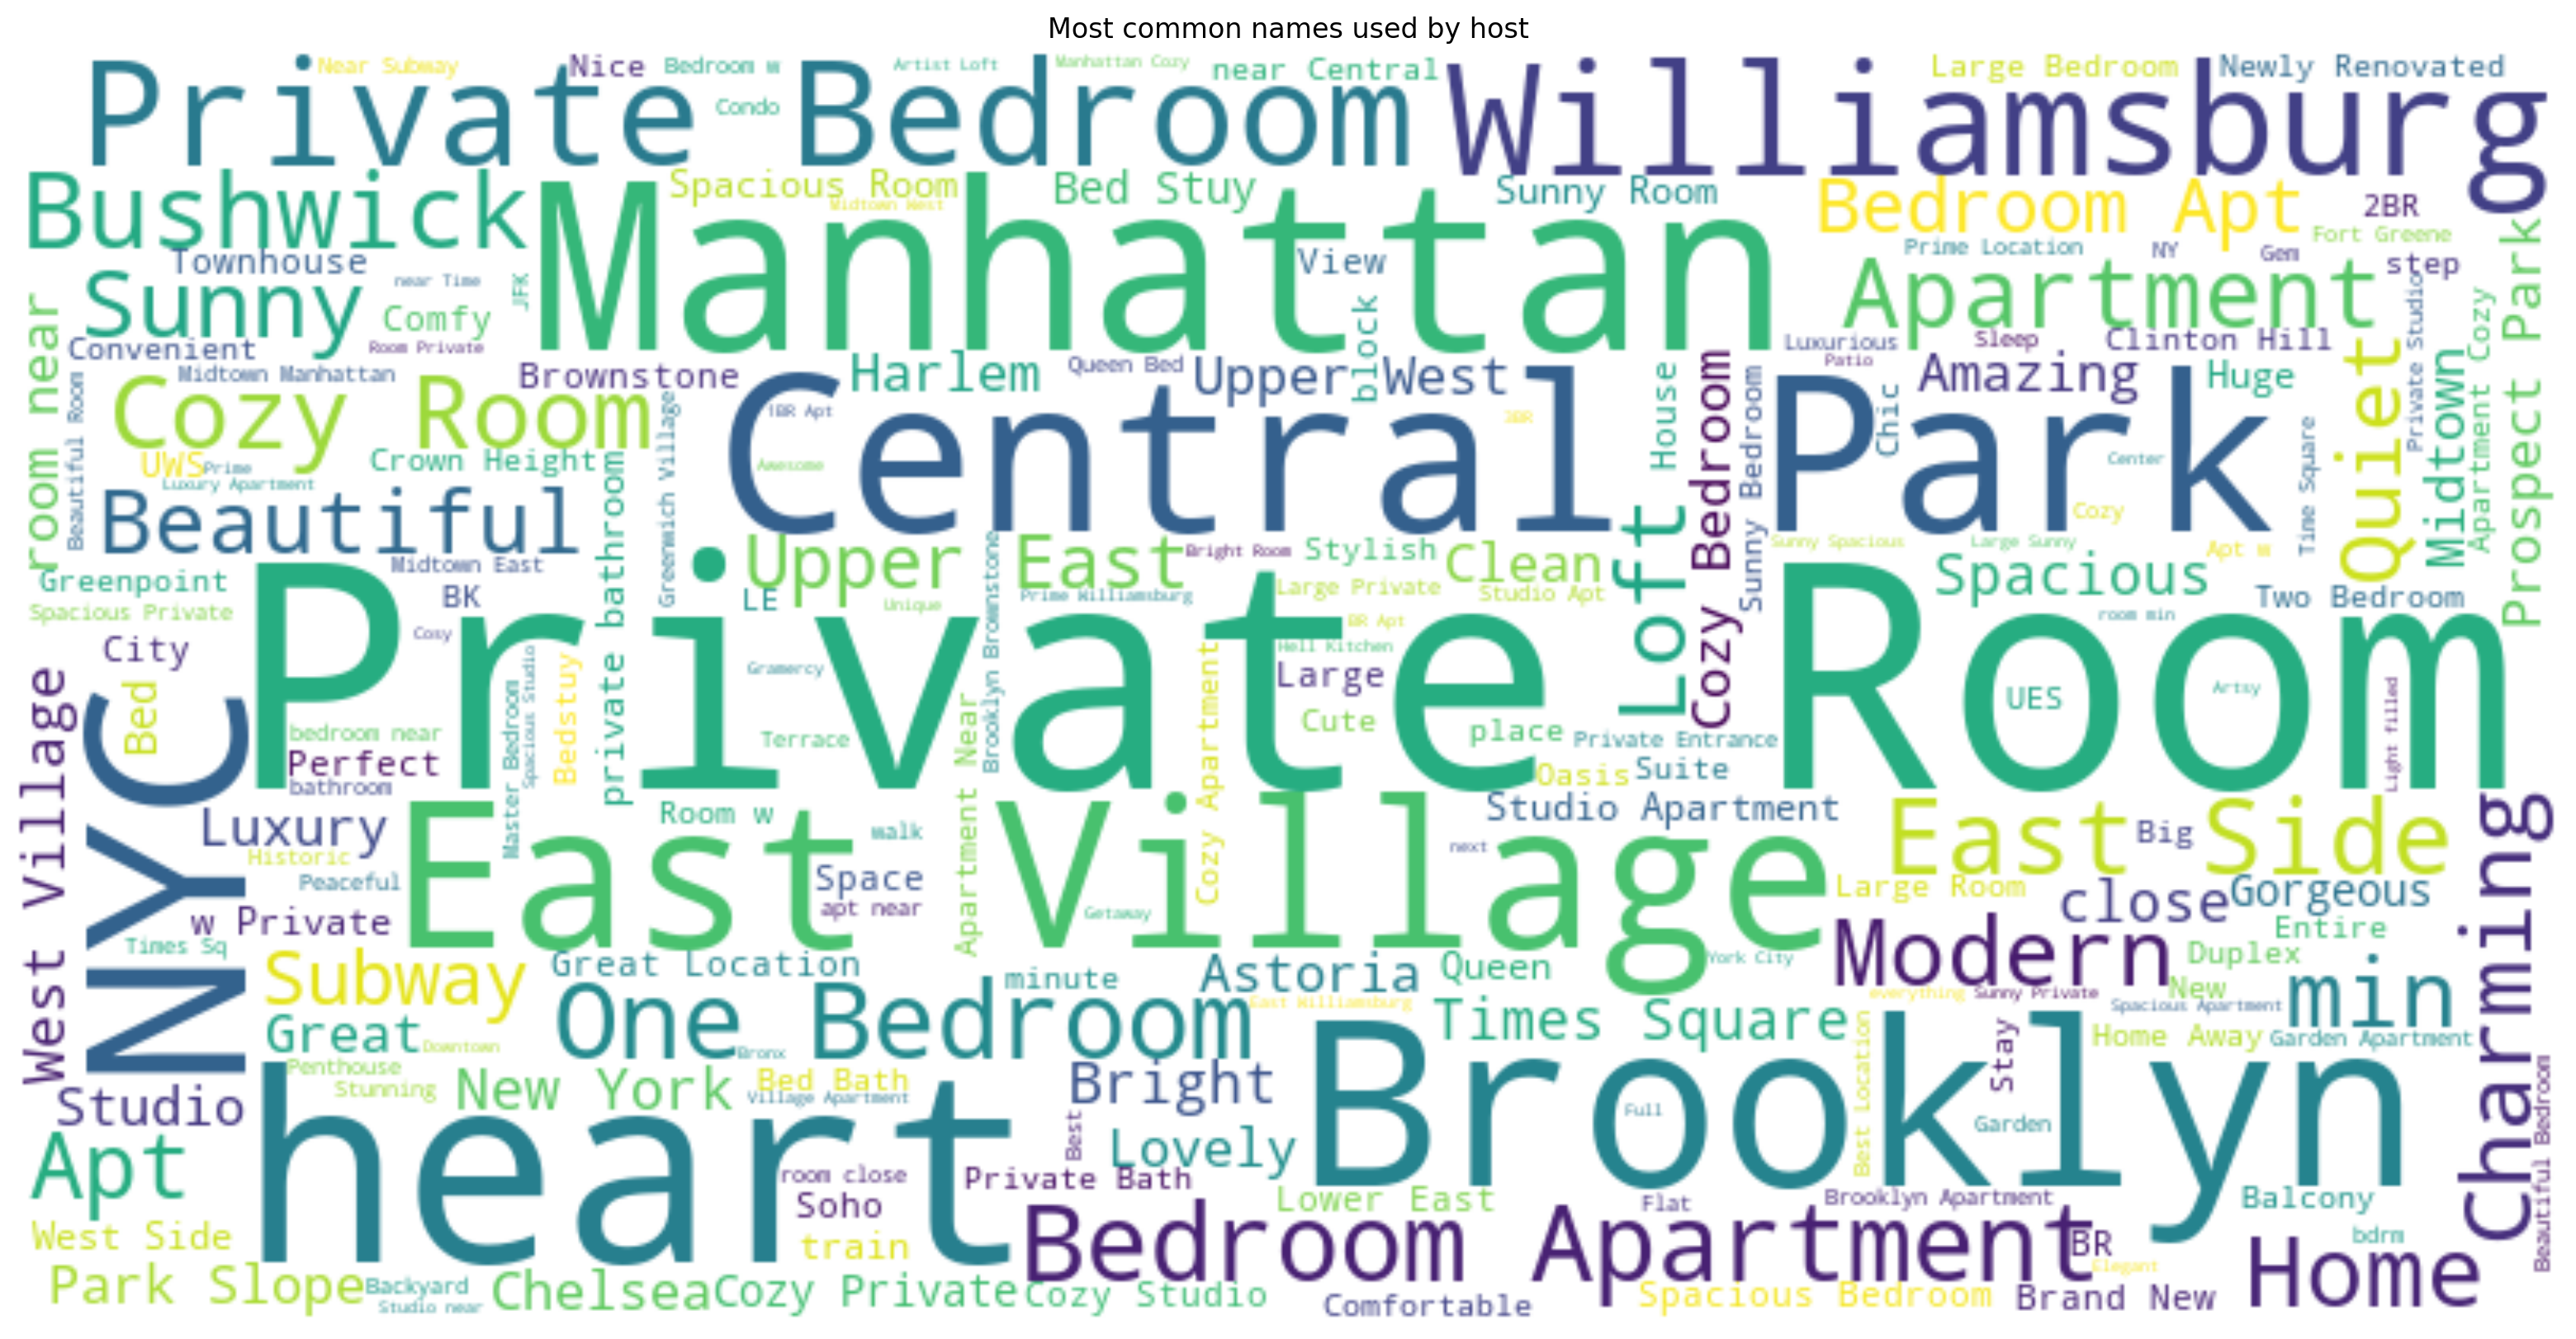

In [18]:
from wordcloud import WordCloud
df = df[~df['NAME'].isnull()]
all_words = ' '.join([text for text in df['NAME']])

wordcloud = WordCloud(background_color='white', width=800, height=400).generate(all_words)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most common names used by host")
#plt.savefig("output", bbox_inches='tight', transparent=True)

plt.show()

Checking the average price per roomtype and see not much of a difference. So let's check average price per roomtype by neighborhood group.

In [19]:
print(df['room type'].unique())

['Private room', 'Entire home/apt', 'Shared room', 'Hotel room']
Categories (4, object): ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']


In [20]:
# df for each neighborhood
df_manhattan = df[df['neighbourhood group']=='Manhattan']
df_brooklyn = df[df['neighbourhood group']=='Brooklyn']
df_queens = df[df['neighbourhood group']=='Queens']
df_bronx = df[df['neighbourhood group']=='Bronx']
df_sisland = df[df['neighbourhood group']=='Staten Island']
# round all the mean numbers to 2 decimal point
def return_array(room, item):
    entry1 = round(df_manhattan[df_manhattan['room type']==room][item].mean(), 2)
    entry2 = round(df_brooklyn[df_brooklyn['room type']==room][item].mean(),2)
    entry3 = round(df_queens[df_queens['room type']==room][item].mean(), 2)
    entry4 = round(df_bronx[df_bronx['room type']==room][item].mean(),2)
    entry5 = round(df_sisland[df_sisland['room type']==room][item].mean(),2)
    return [entry1, entry2, entry3, entry4, entry5]
Private_room_price = return_array('Private room', 'price')
Apt_price = return_array('Entire home/apt', 'price')
Shared_room_price = return_array('Shared room', 'price')
Hotel_price = return_array('Hotel room', 'price')
Private_service_price = return_array('Private room','service fee')
Apt_service_price = return_array('Entire home/apt', 'service fee')
Shared_room_service_price = return_array('Shared room', 'service fee')
Hotel_service_price = return_array('Hotel room', 'service fee')
Private_room_review = return_array('Private room','review rate number')
Apt_review = return_array('Entire home/apt', 'review rate number')
Shared_room_review = return_array('Shared room', 'review rate number')
Hotel_review = return_array('Hotel room', 'review rate number')


data = {'Group': ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
       'Private Room Price': Private_room_price,
       'Apt Price': Apt_price,
       'Shared room Price': Shared_room_price,
       'Hotel Price': Hotel_price,
       'Private Room Service Price': Private_service_price,
       'Apt Service Price': Apt_service_price,
       'Shared room Service Price': Shared_room_service_price,
       'Hotel Service Price': Hotel_service_price,
       'Private Room Review Rate': Private_room_review,
       'Apt Review Rate': Apt_review,
       'Shared room Review Rate': Shared_room_review,
       'Hotel Review Rate': Hotel_review,
       }
df_new = pd.DataFrame(data)
df_new

,Group,Private Room Price,Apt Price,Shared room Price,Hotel Price,Private Room Service Price,Apt Service Price,Shared room Service Price,Hotel Service Price,Private Room Review Rate,Apt Review Rate,Shared room Review Rate,Hotel Review Rate
0,Manhattan,620.59,623.24,633.07,681.87,124.16,124.64,126.62,135.32,3.28,3.28,3.27,3.50
1,Brooklyn,626.08,626.80,634.35,736.12,125.17,125.32,126.78,147.00,3.27,3.25,3.34,3.75
2,Queens,631.94,627.27,643.22,433.25,126.37,125.43,128.63,86.62,3.31,3.35,3.38,3.75
3,Bronx,637.24,623.02,592.78,NaN,127.45,124.59,118.51,NaN,3.33,3.35,3.29,NaN
4,Staten Island,603.84,641.15,715.60,NaN,120.91,128.01,143.07,NaN,3.48,3.33,3.53,NaN


max review for each room type
private room :Staten Island : 3.48
Apt : Queens: 3.35
Shared room: Staten: 3.533
Hotel: Brooklyn: 3.75

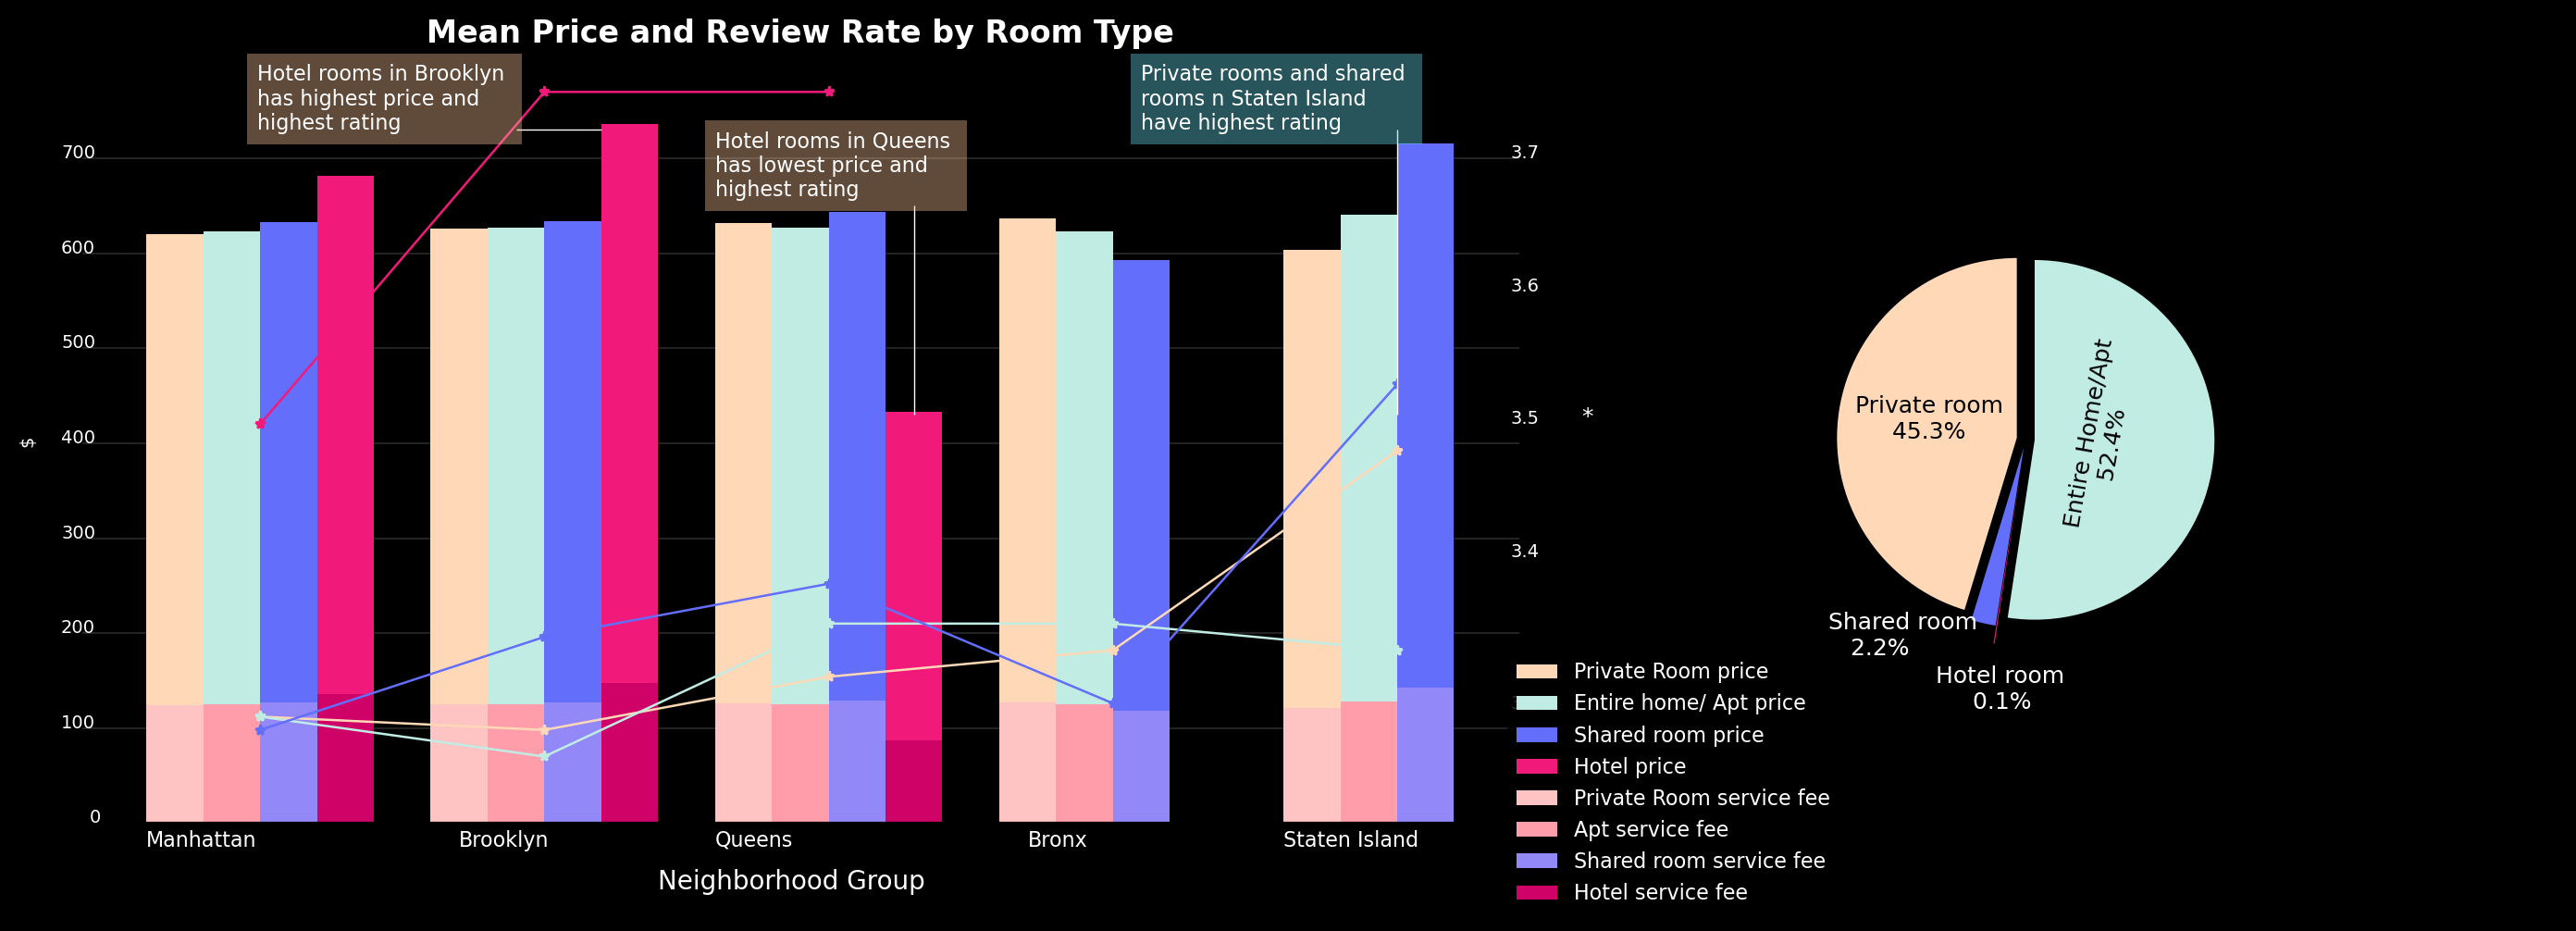

In [21]:
import matplotlib.pyplot as plt
# Create a figure and two subplots for the bar chart and pie chart
fig, (ax1, ax2, ax) = plt.subplots(1, 3, figsize=(14, 5), gridspec_kw={'width_ratios': [8,2.5,0.1]})

# Set the background color of the figure to black
fig.patch.set_facecolor('black')

w = .20
color = ['#FFD9B7', '#C1ECE4', '#636EFA', '#F11A7B', '#FEC4C4', '#FF9EAA', '#9288F8', '#CE0267']

for i in range(5):
    bar1= ax1.bar(i-3*w/2, df_new['Private Room Price'][i], width=w, color=color[0], label="Price")
    bar2= ax1.bar(i-w/2, df_new['Apt Price'][i], width=w, color=color[1], label="Price")
    bar3= ax1.bar(i+w/2, df_new['Shared room Price'][i], width=w, color=color[2], label="Price")
    bar4= ax1.bar(i+3*w/2, df_new['Hotel Price'][i], width=w, color=color[3], label="Price")
    bar5= ax1.bar(i-3*w/2, df_new['Private Room Service Price'][i], width=w, color=color[4], label="Service")
    bar6= ax1.bar(i-w/2, df_new['Apt Service Price'][i], width=w, color=color[5], label="Price")
    bar7= ax1.bar(i+w/2, df_new['Shared room Service Price'][i], width=w, color=color[6], label="Service")
    bar8= ax1.bar(i+3*w/2, df_new['Hotel Service Price'][i], width=w, color=color[7], label="Service")
  
#plot lines
ax1.plot(df_new['Group'], (df_new["Private Room Review Rate"]-3.2)*1400, color = color[0], lw=0.9, marker='*', markersize = 4, label='Private Room Review Rate') 
ax1.plot(df_new['Group'], (df_new["Apt Review Rate"]-3.2)*1400, color = color[1], lw=0.9, ls=None, marker='*', markersize = 4, label="Apt Price Review Rate") 
ax1.plot(df_new['Group'], (df_new["Shared room Review Rate"]-3.2)*1400, color = color[2], lw=0.9, marker='*', markersize = 4, label='Private Room Review Rate') 
ax1.plot(df_new['Group'], (df_new["Hotel Review Rate"]-3.2)*1400, color = color[3], lw=0.9, ls=None, marker='*', markersize = 4, label="Apt Price Review Rate") 

ax1.text(-0.4,-25,"Manhattan",fontsize=8, color="white") #fantasy
ax1.text(0.7,-25,"Brooklyn",fontsize=8, color="white") #fantasy
ax1.text(1.6,-25,"Queens",fontsize=8, color="white") #fantasy
ax1.text(2.7,-25,"Bronx",fontsize=8, color="white") #fantasy
ax1.text(3.6,-25,"Staten Island",fontsize=8, color="white") #fantasy
ax1.text(1.4,-70,"Neighborhood Group",fontsize=10,color="white")
ax1.text(-0.6,0, "0",fontsize=7, color="white")
ax1.text(-0.7,100, "100",fontsize=7, color="white")
ax1.text(-0.7,200, "200",fontsize=7, color="white")
ax1.text(-0.7,300, "300",fontsize=7, color="white")
ax1.text(-0.7,400, "400",fontsize=7, color="white")
ax1.text(-0.7,500, "500",fontsize=7, color="white")
ax1.text(-0.7,600, "600",fontsize=7, color="white")
ax1.text(-0.7,700, "700",fontsize=7, color="white")
ax1.text(-0.85,400, "$",fontsize=7, color="white", rotation=90)
ax1.text(4.4,120, "3.3",fontsize=7, color="white")
ax1.text(4.4,280, "3.4",fontsize=7, color="white")
ax1.text(4.4,420, "3.5",fontsize=7, color="white")
ax1.text(4.4,560, "3.6",fontsize=7, color="white")
ax1.text(4.4,700, "3.7",fontsize=7, color="white")
ax1.text(4.65,420, "*",fontsize=9, color="white")
set1 = dict(facecolor='#f2bc94', edgecolor='none', alpha=0.4)
ax1.text(-0.01,730,"Hotel rooms in Brooklyn \nhas highest price and \nhighest rating",fontsize=8,bbox=set1, color="white",alpha=1)
ax1.hlines(y=730,xmin=0.9,xmax=1.2,color='white',linewidth=0.5)
ax1.text(1.6,660,"Hotel rooms in Queens \nhas lowest price and \nhighest rating",fontsize=8,bbox=set1, color="white",alpha=1)
ax1.vlines(x=2.3,ymin=430,ymax=650,color='white',linewidth=0.5)
set2 = dict(facecolor='#66D6E7', edgecolor='none', alpha=0.4)
ax1.text(3.1,730,"Private rooms and shared \nrooms n Staten Island \nhave highest rating",fontsize=8, bbox=set2, color="white", alpha=1)
ax1.vlines(x=4,ymin=430,ymax=730,color='white',linewidth=0.5)

ax1.set_yticks([])
ax1.set_xticks([])
ax1.set_title('Mean Price and Review Rate by Room Type', fontsize=12, weight="bold", pad = 5)
ax1.title.set_color('white')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_facecolor(color='black')
ax.set_facecolor(color='black')
ax1.axhline(y=100, color='white',linewidth=0.1, zorder=0)
ax1.axhline(y=200, color='white',linewidth=0.1, zorder=0)
ax1.axhline(y=300, color='white',linewidth=0.1, zorder=0)
ax1.axhline(y=400, color='white',linewidth=0.1, zorder=0)
ax1.axhline(y=500, color='white',linewidth=0.1, zorder=0)
ax1.axhline(y=600, color='white',linewidth=0.1, zorder=0)
ax1.axhline(y=700, color='white',linewidth=0.1, zorder=0)

pie_labels = ['Private room', 'Shared room', 'Hotel', 'Entire Home/Apt']
pie_values = [45.3, 2.2, 0.1, 52.4]
explode = (0.05, 0.05, 0.15, 0.05)

# Create the pie chart
label_texts = ax2.pie(pie_values, labels=pie_labels, colors=[color[0], color[2], color[3], color[1]],explode=explode, startangle=90) #autopct='%1.1f%%', textprops={'color': 'black', 'size':7})
ax2.text(-0.95,0.005, "Private room \n     45.3%",fontsize=9, color="black")
ax2.text(0.2,-0.5, "Entire Home/Apt \n       52.4%",fontsize=9, color="black", rotation=80)
ax2.text(-1.1,-1.2, "Shared room \n   2.2%",fontsize=9, color="white")
ax2.text(-0.5,-1.5, "Hotel room \n     0.1%",fontsize=9, color="white")
#ax2.vlines(x=-1,ymin=-1.6,ymax=-1.3,color='white',linewidth=1)

plt.tight_layout()
legend = ax.legend([bar1, bar2, bar3, bar4, bar5, bar6, bar7, bar8], ['Private Room price', 'Entire home/ Apt price', 'Shared room price', 'Hotel price', 'Private Room service fee', 'Apt service fee', 'Shared room service fee', 'Hotel service fee'],fontsize=8, 
                   loc='lower right', facecolor='black', edgecolor='black',bbox_to_anchor=(-38, -0.13))
for text in legend.get_texts():
    text.set_color('white')
    
#plt.savefig("barplot", bbox_inches='tight', transparent=True)
plt.show()

We can see that although Private rooms and Entire homes/Apartments dominate the number of listings on Airbnb, they generally have lower price and ratings compared to Shared rooms and Hotels.

We also create the same visualization with plotly in their studios to interact on webpage